In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read data
df = pd.read_csv('data/sales_data.csv', parse_dates=['order_date'],header=0)
df.head()

,order_id,order_date,product_id,quantity,price,customer_id
0,41,2023-01-10,P003,4,20.41,C013
1,403,2023-01-10,P001,7,47.17,C034
2,994,2023-01-10,P004,4,81.80,C019
3,226,2023-01-11,P016,10,115.17,C043
4,187,2023-01-11,P010,6,144.55,C006


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     1000 non-null   int64         
 1   order_date   1000 non-null   datetime64[ns]
 2   product_id   1000 non-null   object        
 3   quantity     1000 non-null   int64         
 4   price        1000 non-null   float64       
 5   customer_id  1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [6]:
# check missing values
df.isnull().sum()

order_id       0
order_date     0
product_id     0
quantity       0
price          0
customer_id    0
dtype: int64

In [7]:
# check if there are other missing values types
print("NaN values:", df.isnull().values.any())

NaN values: False


In [8]:
# check if there are duplicates
print("Duplicate values:", df.duplicated().any())

Duplicate values: False


In [10]:
# compute total revenue per order
df['total_revenue'] = df['quantity'] * df['price']
df.head()

,order_id,order_date,product_id,quantity,price,customer_id,total_revenue
0,41,2023-01-10,P003,4,20.41,C013,81.64
1,403,2023-01-10,P001,7,47.17,C034,330.19
2,994,2023-01-10,P004,4,81.80,C019,327.20
3,226,2023-01-11,P016,10,115.17,C043,1151.70
4,187,2023-01-11,P010,6,144.55,C006,867.30


In [12]:
# aggregate sales by product
sales_by_product = df.groupby('product_id')['total_revenue'].sum().sort_values(ascending=False)
sales_by_product.head()

product_id
P020    41258.83
P009    35546.36
P013    35321.44
P014    34577.96
P001    31416.23
Name: total_revenue, dtype: float64

In [15]:
sales_by_month = df.groupby(df['order_date'].dt.to_period('M'))['total_revenue'].sum().sort_values(ascending=False)
sales_by_month.head()

order_date
2023-08    29603.45
2024-03    28851.07
2023-10    28712.91
2023-11    28149.12
2024-12    27360.31
Freq: M, Name: total_revenue, dtype: float64

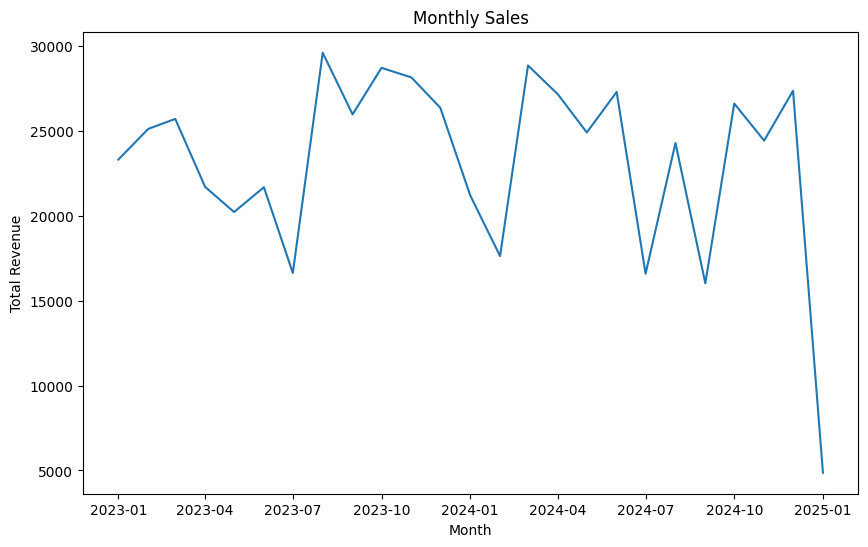

In [17]:
# plot monthly sales using matplotlib
sales_by_month.index = sales_by_month.index.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales')
plt.show()

In [18]:
# Find the top 5 customers in terms of total spending
top_5_customers = df.groupby('customer_id')['total_revenue'].sum().nlargest(5)
top_5_customers

customer_id
C041    18353.20
C046    17980.92
C048    17791.92
C019    17104.86
C040    16773.06
Name: total_revenue, dtype: float64

In [19]:
# Count how many unique products each of these top 5 customers purchased
top_5_customers_products = df[df['customer_id'].isin(top_5_customers.index)].groupby('customer_id')['product_id'].nunique()
top_5_customers_products

customer_id
C019    15
C040    14
C041    15
C046    15
C048    15
Name: product_id, dtype: int64